In [1]:
import psycopg2
import pandas as pd

# PostgreSQL database settings
DB_NAME = 'fyp_database'
DB_USER = 'postgres'
DB_PASSWORD = 'HayatKhan'
DB_HOST = 'fyp-database.cdesuu80g5zo.eu-north-1.rds.amazonaws.com'  # usually 'localhost' if running locally
DB_PORT = '5432'  # usually '5432' for PostgreSQL

try:
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(
        dbname=DB_NAME,
        user=DB_USER,
        password=DB_PASSWORD,
        host=DB_HOST,
        port=DB_PORT
    )

    # Create a cursor object to execute SQL queries
    cur = conn.cursor()

    # Execute SQL query to fetch data from the table
    cur.execute("SELECT * FROM tank_1")

    # Fetch all rows from the result set
    rows = cur.fetchall()

    # Get column names from the cursor description
    col_names = [desc[0] for desc in cur.description]

    # Create a DataFrame from the fetched rows and column names
    df = pd.DataFrame(rows, columns=col_names)

    # Display the DataFrame
    print(df)

except psycopg2.Error as e:
    print("An error occurred:", e)

finally:
    # Close the database connection
    if 'cur' in locals():
        cur.close()

    if 'conn' in locals():
        conn.close()


      id                  timestamp  x_axis  y_axis  z_axis   latitude  \
0     61 2024-04-28 13:49:00.469790  255.08    0.86    0.18   0.000000   
1     62 2024-04-28 13:49:01.490054  255.10    0.87    0.23  33.641904   
2     63 2024-04-28 13:49:03.424920  255.13    0.88    0.09  33.641896   
3     64 2024-04-28 13:49:05.424269  255.00    0.74    0.05  33.641886   
4     65 2024-04-28 13:49:07.424476  255.52    0.98    0.14  33.641886   
..   ...                        ...     ...     ...     ...        ...   
471  532 2024-04-28 14:05:53.008022  255.52    0.58  254.90  33.640076   
472  533 2024-04-28 14:05:53.623028  255.56    0.59  254.86  33.640076   
473  534 2024-04-28 14:05:54.502163  255.57    0.60  254.85  33.640076   
474  535 2024-04-28 14:05:55.508452    0.07    0.50  254.82  33.640076   
475  536 2024-04-28 14:05:56.288886  255.52  255.10  254.79  33.640076   

     longitude  altitude  
0     0.000000       0.0  
1    72.992653     551.3  
2    72.992652     550.0  
3  

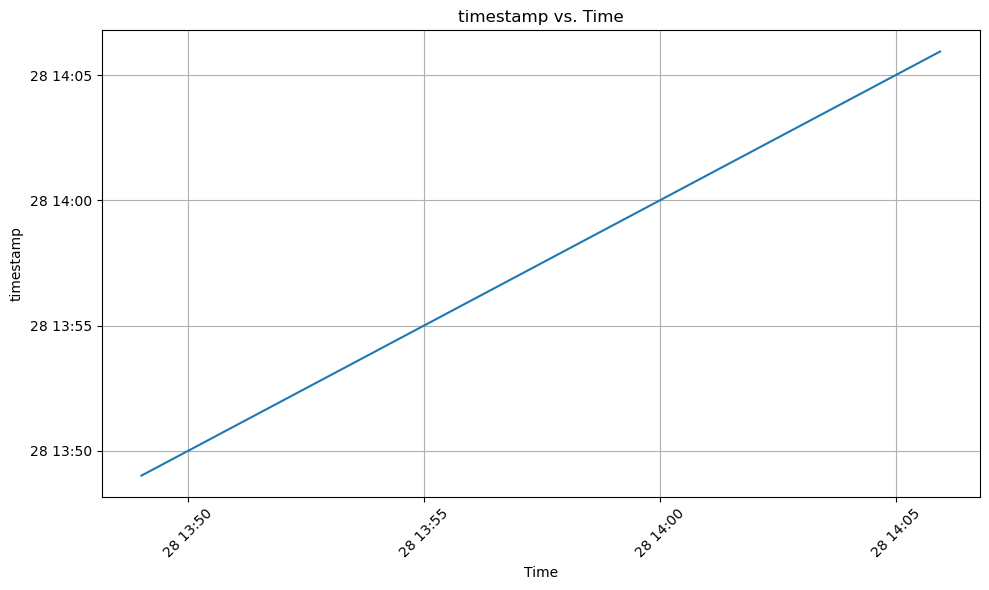

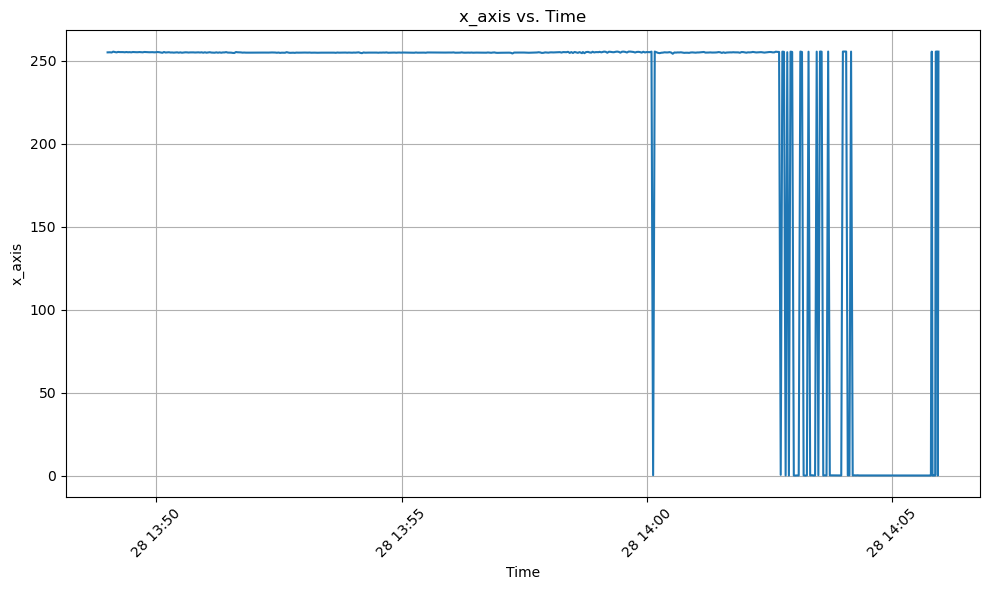

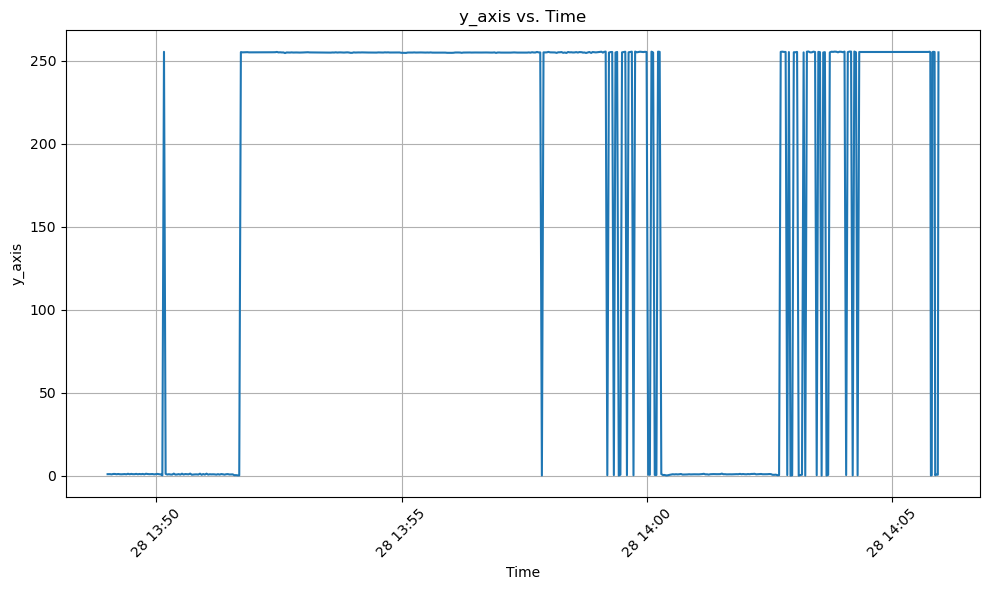

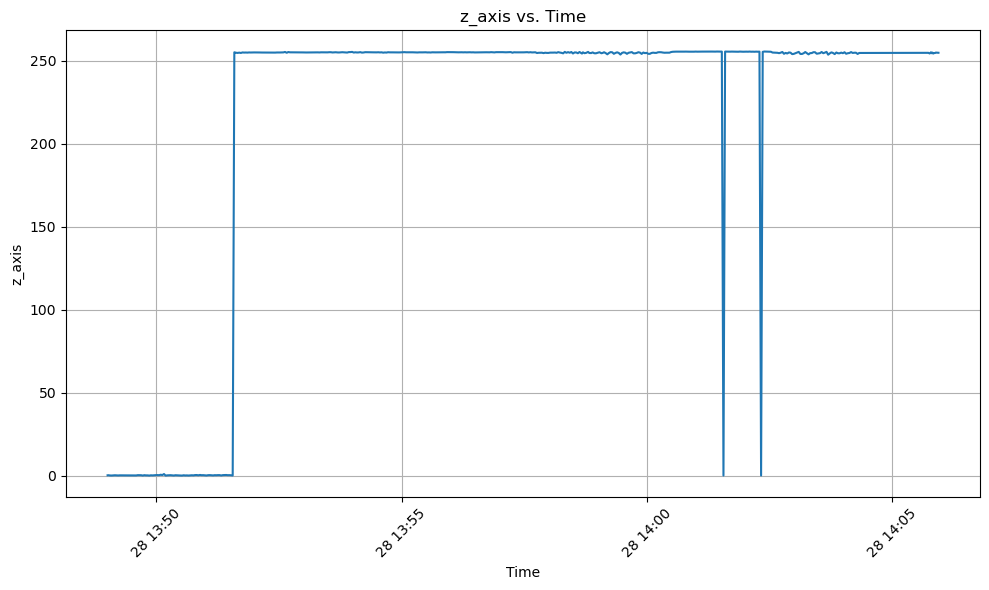

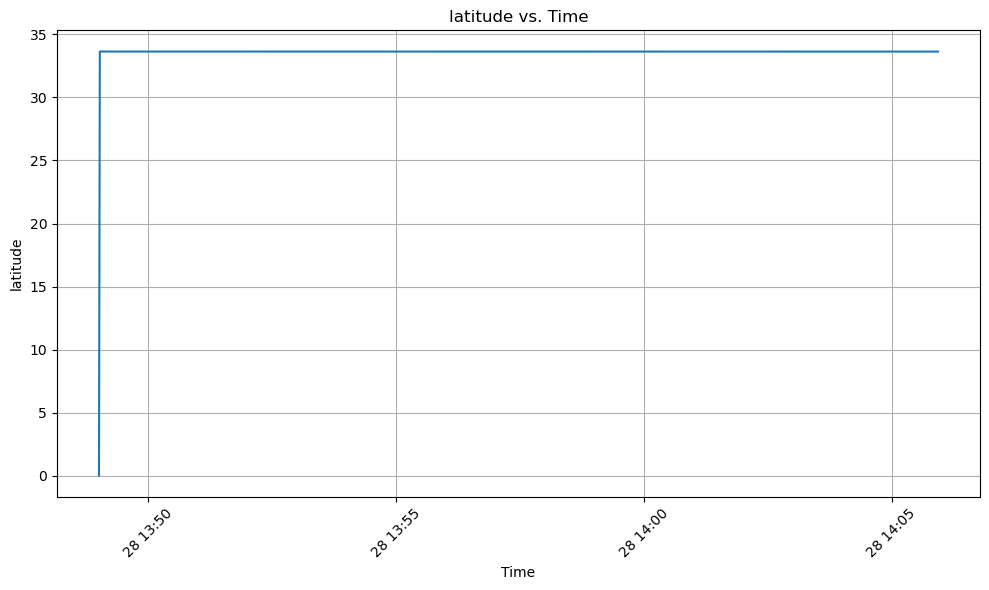

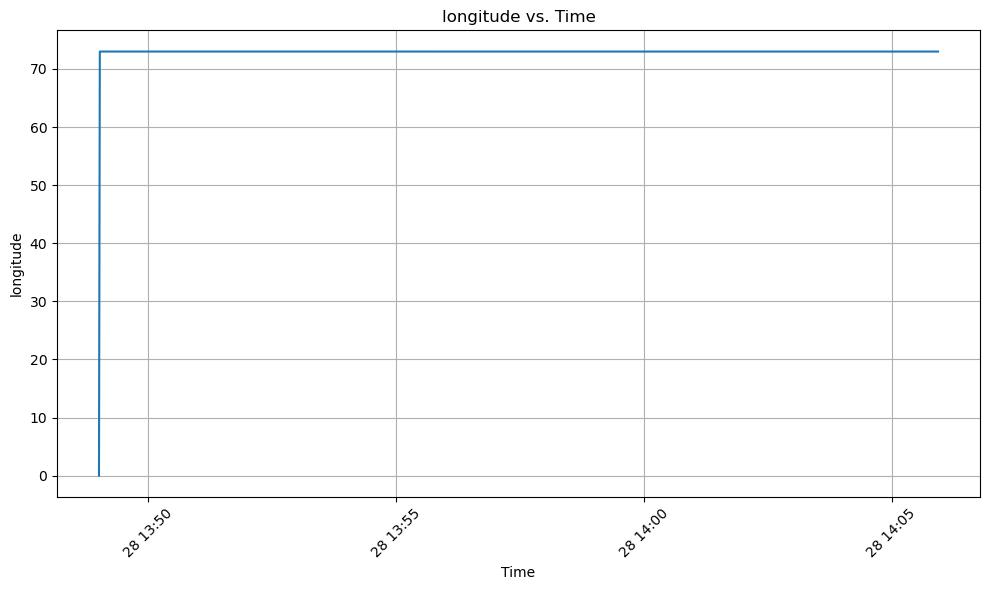

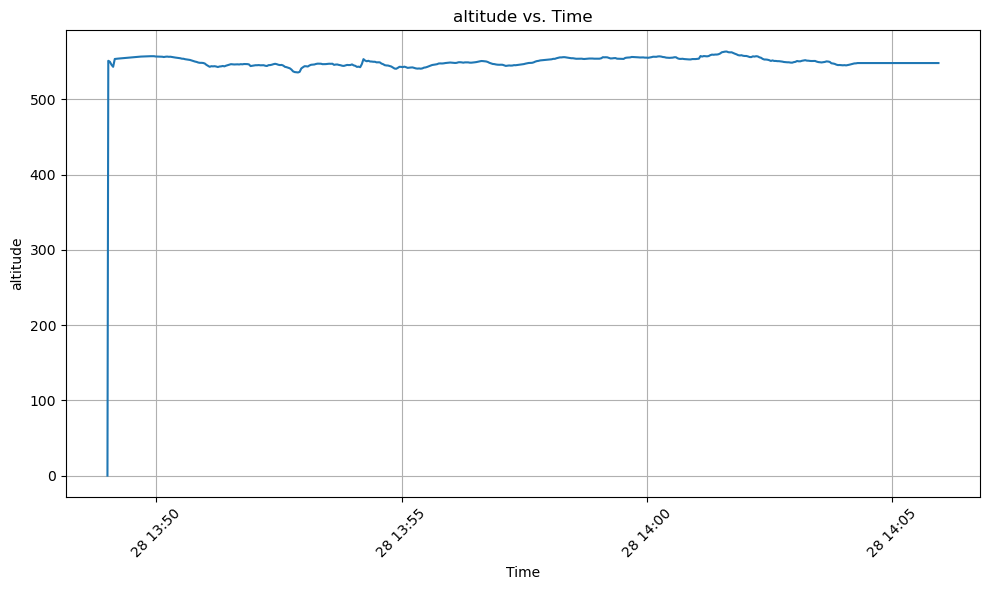

In [2]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# PostgreSQL database settings
DB_NAME = 'fyp_database'
DB_USER = 'postgres'
DB_PASSWORD = 'HayatKhan'
DB_HOST = 'fyp-database.cdesuu80g5zo.eu-north-1.rds.amazonaws.com'  # usually 'localhost' if running locally
DB_PORT = '5432'  # usually '5432' for PostgreSQL

try:
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(
        dbname=DB_NAME,
        user=DB_USER,
        password=DB_PASSWORD,
        host=DB_HOST,
        port=DB_PORT
    )

    # Create a cursor object to execute SQL queries
    cur = conn.cursor()

    # Execute SQL query to fetch data from the table
    cur.execute("SELECT * FROM tank_1")

    # Fetch all rows from the result set
    rows = cur.fetchall()

    # Get column names from the cursor description
    col_names = [desc[0] for desc in cur.description]

    # Create a DataFrame from the fetched rows and column names
    df = pd.DataFrame(rows, columns=col_names)

    # Convert timestamp column to datetime type
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Plot each column against time
    for col in col_names[1:]:  # Exclude 'timestamp' column
        plt.figure(figsize=(10, 6))
        plt.plot(df['timestamp'], df[col])
        plt.title(col + " vs. Time")
        plt.xlabel("Time")
        plt.ylabel(col)
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

except psycopg2.Error as e:
    print("An error occurred:", e)

finally:
    # Close the database connection
    if 'cur' in locals():
        cur.close()

    if 'conn' in locals():
        conn.close()
